# LAB #13 - ML × AR — Gesture Recognition

## Hand Gesture Capture and Rule-Based Gesture Prediction Function
This function captures live video from the webcam and detects a single hand using MediaPipe.
It classifies the hand gesture into OPEN_HAND, FIST, or POINTING using landmark-based rules and overlays the prediction.
Once a valid gesture is detected, it returns the predicted label along with the annotated frame for display or saving.

In [21]:
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils


def capture_and_predict_gesture():
    hands = mp_hands.Hands(max_num_hands=1)
    cap = cv2.VideoCapture(0)

    def finger_open(tip, pip):
        return tip.y < pip.y

    def predict_gesture(lm):
        thumb = lm[4].x > lm[3].x
        index = finger_open(lm[8], lm[6])
        middle = finger_open(lm[12], lm[10])
        ring = finger_open(lm[16], lm[14])
        pinky = finger_open(lm[20], lm[18])

        if all([thumb, index, middle, ring, pinky]):
            return "OPEN_HAND"

        if not any([index, middle, ring, pinky]):
            return "FIST"

        if index and not middle and not ring and not pinky:
            return "POINTING"

        return "UNKNOWN"

    saved_frame = None
    predicted_gesture = None

    while True:
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(rgb)

        if results.multi_hand_landmarks:
            hand = results.multi_hand_landmarks[0]
            lm = hand.landmark

            gesture = predict_gesture(lm)

            mp_draw.draw_landmarks(
                frame,
                hand,
                mp_hands.HAND_CONNECTIONS,
                mp_draw.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=4),
                mp_draw.DrawingSpec(color=(255, 255, 255), thickness=2)
            )

            cv2.putText(frame, f"Gesture: {gesture}", (40, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)

            if gesture in ["OPEN_HAND", "FIST", "POINTING"]:
                saved_frame = frame.copy()
                predicted_gesture = gesture
                break

        cv2.imshow("Gesture Prediction", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

    return predicted_gesture, saved_frame


# Results:
## 1. Open hand


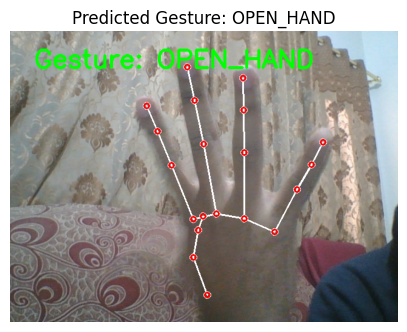

In [17]:
import matplotlib.pyplot as plt
import cv2

gesture, frame = capture_and_predict_gesture()

if frame is not None:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(frame)
    plt.axis("off")
    plt.title(f"Predicted Gesture: {gesture}")
    plt.show()
else:
    print("No gesture captured")

## 2. Fist

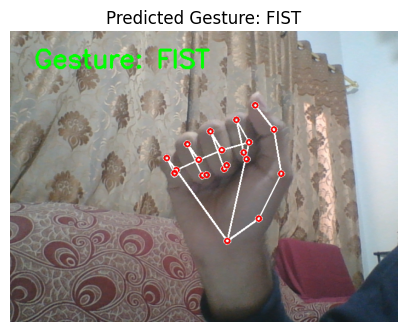

In [19]:
import matplotlib.pyplot as plt
import cv2

gesture, frame = capture_and_predict_gesture()

if frame is not None:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(frame)
    plt.axis("off")
    plt.title(f"Predicted Gesture: {gesture}")
    plt.show()
else:
    print("No gesture captured")

## 3. Pointing

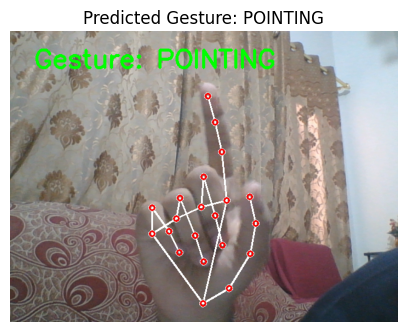

In [20]:
import matplotlib.pyplot as plt
import cv2

gesture, frame = capture_and_predict_gesture()

if frame is not None:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(frame)
    plt.axis("off")
    plt.title(f"Predicted Gesture: {gesture}")
    plt.show()
else:
    print("No gesture captured")